# Sentiment Analysis

## Motivation

I am a huge movie buff. My favourite thing to do is to watch movies. And I wanted to try a sentiment analysis in Python. Therefore I thought it would be great to do a sentiment analysis on the IMDb datasets. 

## IMDb review dataset

Originally sourced from [Stanford](https://ai.stanford.edu/~amaas/data/sentiment/), I decided to use the nicely packaged version from [Kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv).

## additional movie data

These only provide the review as a score not as text available for sentiment analysis.

- [The Open Movie Database](http://www.omdbapi.com/) <br />
A RESTful API database to access movie information. Last updated 2019. <br />
- [Rotten Tomatoes](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset) <br />
Good old Kaggle dataset from Rotten Tomatoes. Note for future self - to access Rotten Tomatoes API you need to register for a key and they will not give this out for general use. <br />
- [IMDb Datasets](https://www.imdb.com/interfaces/)<br />
Direct from the website (downloaded 12 October 2021)
- [IMDb Dataset 2](https://aws.amazon.com/marketplace/pp/prodview-rvhjlbc3larps?sr=0-1&ref_=beagle&applicationId=AWSMPContessa#usage)<br />
AWS IMDb dataset sample
- [FilmTV](https://www.kaggle.com/stefanoleone992/filmtv-movies-dataset)
Also from Kaggle. This data was scrapped 10 Sept 2021.

## Data preprocessing

In [2]:
# load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# load data
imdb_review_df = pd.read_csv('data/raw_data/IMDB Dataset.csv.zip')

Let's have a quick look at the data

In [4]:
imdb_review_df.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
imdb_review_df.isnull().count()

review       50000
sentiment    50000
dtype: int64

Let's check the sentiment column to see the distribution of positive and negative reviews.

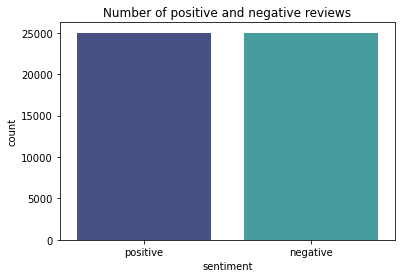

In [9]:
sns.countplot(x='sentiment', palette = 'mako', data=imdb_review_df)
plt.title('Number of positive and negative reviews');

Great! We have 50 000 reviews, half labelled as positive and the other half as negative. And the full review text. <br />
The review text is a little messy with markdown characters. Remove these before continuing.

In [15]:
imdb_review_df_clean = imdb_review_df.copy()

In [22]:
# replace punctuation characters in review
imdb_review_df_clean['review'] = imdb_review_df.review.str.replace(
    "[.;:!\'?,\"()\[\]]", "").copy()

# replace line breaks with a space
imdb_review_df_clean['review'] = imdb_review_df.review.str.replace(
    "(<br\s*/><br\s*/>)|(\-)|(\/)", " ").copy()

# set review to lower case
imdb_review_df_clean['review'] = imdb_review_df_clean['review'].str.lower()


/Users/annebraae/opt/anaconda3/envs/python3-7_proj/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/annebraae/opt/anaconda3/envs/python3-7_proj/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
